<a href="https://colab.research.google.com/github/unknown-jun/First_step_of_data_analist/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 로드

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 1000)

In [154]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [156]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [157]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [158]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 결측치 처리

In [159]:
regex = re.compile('[\w]+, ([\w]+)')
def mr_miss(x):
    return regex.findall(x)[0]
train['Title'] = train['Name'].apply(mr_miss)
test['Title'] = train['Name'].apply(mr_miss)

In [160]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [161]:
train.groupby('Title')['Age'].mean()

Title
Capt        70.000000
Col         58.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
the         33.000000
Name: Age, dtype: float64

In [152]:
train[train['Title']=='Capt'] # dead
train[train['Title']=='Don'] # dead
train[train['Title']=='Jonkheer'] # dead
train[train['Title']=='Rev'] # dead

# train[train['Title']=='Mlle'] # survived
# train[train['Title']=='Mme'] # survived
# train[train['Title']=='the'] # survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S,Rev
150,1042,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C,Rev
249,1141,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",female,NaN,1,0,2660,14.4542,NaN,C,Rev


0.0


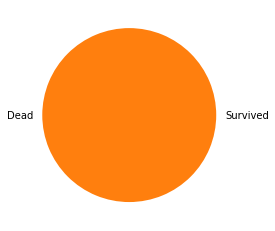

In [151]:
def title_ratio(feature):
    survived = len(train[train['Survived'] == 1] [train['Title']==feature])
    dead = len(train[train['Survived'] == 0] [train['Title']==feature])
    plt.pie([survived, dead],labels=['Survived', 'Dead'])
    print(survived / len(train[train['Title']==feature]))

title_ratio('Rev')

In [72]:
train['Title'].replace('the','Mr',inplace=True)

In [67]:
train['Title'] == 'Don']

SyntaxError: ignored

In [9]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출
    feature_size = feature_ratio.size
    # 전체 데이터 수
    feature_index = feature_ratio.index
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출한 값의 index를 가지고 옴
    survived = train[train['Survived'] == 1] [feature].value_counts()
    # Survivde 에서 1인 값들을 기준으로 feature의 값들을 추출
    dead = train[train['Survived']==0][feature].value_counts()
    # Survivde 에서 0인 값들을 기준으로 feature의 값들을 추출

    plt.plot(aspect='auto')
    plt.pie(feature_ratio,labels=feature_index, autopct = '%1.1f%%')
    # autopct = 퍼센트 단위를 정해줌
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index)+ '\'s ratio')

    plt.show

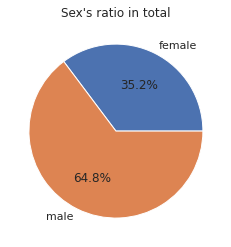

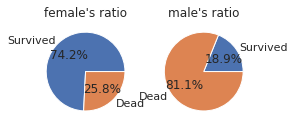

In [10]:
pie_chart('Sex')

In [11]:
train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [12]:
train.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [13]:
train.groupby('Embarked')['Fare'].agg([max, min])

,max,min
Embarked,,
C,512.3292,4.0125
Q,90.0000,6.7500
S,263.0000,0.0000


In [14]:
train.groupby('Pclass')['Fare'].agg([max, min])

,max,min
Pclass,,
1,512.3292,0.0
2,73.5000,0.0
3,69.5500,0.0


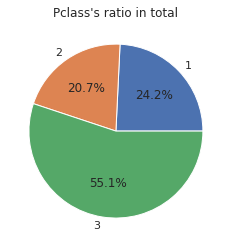

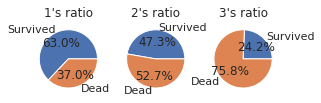

In [15]:
pie_chart('Pclass')

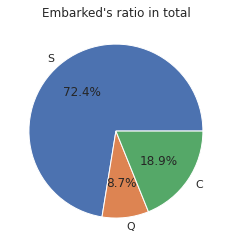

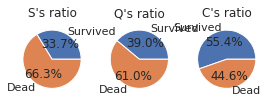

In [16]:
pie_chart('Embarked')

이름을 통한 나이 계산  
티켓을 통한 생존률 변화  
티켓 가격이 0인 사람들은 승무원일 것이다.  
승무원의 생존률은 어떨까?  
파트너의 수에 따른 생존률은 어떨까?  

- c 클래스가 생존율이 비교적 높으며 가장 숫자가 적으며 평균 요금이 가장 높다.  
- 1 등실 생존률은 63%인데 반해, 3 등급 생존률은 24.2%에 불과하다.
- Fare가 0인 사람들은 1명만이 살아남았다.

In [17]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [18]:
train.sort_values(by=['Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.0000,B94,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [19]:
train[train['Cabin'].str.contains('C23', na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [20]:
train[train['Ticket'].str.contains('PC 177')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C


In [21]:
train[train['Ticket'].str.contains('C.A.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S


In [22]:
train[train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [23]:
train['Ticket'].count()

891

In [24]:
# Survived = train[['Survived']==1]
train.groupby([train['SibSp'],train['Survived']])['PassengerId'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

In [25]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출
    feature_size = feature_ratio.size
    # 전체 데이터 수
    feature_index = feature_ratio.index
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출한 값의 index를 가지고 옴
    survived = train[train['Survived'] == 1] [feature].value_counts()
    # Survivde 에서 1인 값들을 기준으로 feature의 값들을 추출
    dead = train[train['Survived']==0][feature].value_counts()
    # Survivde 에서 0인 값들을 기준으로 feature의 값들을 추출

    plt.plot(aspect='auto')
    plt.pie(feature_ratio,labels=feature_index, autopct = '%1.1f%%')
    # autopct = 퍼센트 단위를 정해줌
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index)+ '\'s ratio')

    plt.show

In [65]:
train.shape[0]

891

In [83]:
result = []
for i in range(train.shape[0]):
    word = train['Name'].str.split(',')
    print(word)
#    print(name)
#result

Streaming output truncated to the last 5000 lines.
352                                [Elias,  Mr. Tannous]
353                         [Arnold-Franchi,  Mr. Josef]
354                                 [Yousif,  Mr. Wazli]
355                       [Vanden Steen,  Mr. Leo Peter]
356                       [Bowerman,  Miss. Elsie Edith]
357                         [Funk,  Miss. Annie Clemmer]
358                              [McGovern,  Miss. Mary]
359                 [Mockler,  Miss. Helen Mary "Ellie"]
360                                [Skoog,  Mr. Wilhelm]
361                         [del Carlo,  Mr. Sebastiano]
362                   [Barbara,  Mrs. (Catherine David)]
363                                   [Asim,  Mr. Adola]
364                               [O'Brien,  Mr. Thomas]
365                    [Adahl,  Mr. Mauritz Nils Martin]
366    [Warren,  Mrs. Frank Manley (Anna Sophia Atkin...
367                    [Moussa,  Mrs. (Mantoura Boulos)]
368                               [Je